In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import least_squares
from scipy.optimize import minimize_scalar

In [85]:
def rosen(x):
    return sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2)

def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2)-400*(xm_p1-xm**2)*xm-2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2)-2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der
    
def rosen_hess(x):
    x = np.asarray(x0)
    H = np.diag(-400*x[:-1],1) - np.diag(-400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [44]:
# Initial values
x0 = np.array([1.3,0.7,0.8,1.9,1.2])

In [45]:
# Nelder-Mead Simplex algorithm
res = minimize(rosen, x0, method='nelder-mead', options={'xtol':1e-8, 'disp':True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[1. 1. 1. 1. 1.]


In [46]:
# Powell
res = minimize(rosen, x0, method='powell', options={'xtol':1e-8, 'disp':True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 1622
[1. 1. 1. 1. 1.]


In [55]:
# Broyden-Fletcher-Goldfarb-Shanno algorithm
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,options={'disp':True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


In [143]:
def model(x, u):
    return x[0]*(u**2 + x[1]*u) / (u**2 + x[2]*u+x[3])

def fun(x, u, y):
    return model(x,u)- y

def jac(x, u, y):
    J = np.empty((u.size, x.size))
    den = u**2 + x[2]*u + x[3]
    num = u**2 + x[1]*u
    J[:,0] = num/den
    J[:,1] = x[0]*u/den
    J[:,2] = -x[0]*num*u/den**2
    J[:,3] = -x[0]*num/den**2
    return J

In [141]:
u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
              8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,
              4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
x0 = np.array([2.5, 3.9, 4.15, 3.9])

`ftol` termination condition is satisfied.
Function evaluations 130, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.92e-08.


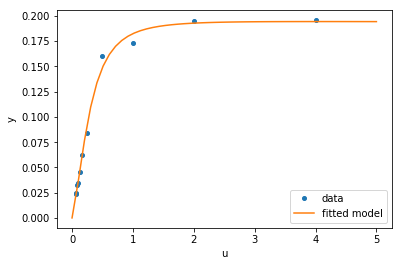

In [161]:
# Least-squares minimization

res = least_squares(fun, x0, jac=jac, bounds=(0,100), args=(u,y), verbose=1)

u_test = np.linspace(0,5)
y_test = model(res.x, u_test)
plt.plot(u,y, 'o', markersize=4, label='data')
plt.plot(u_test, y_test, label='fitted model')
plt.xlabel('u')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

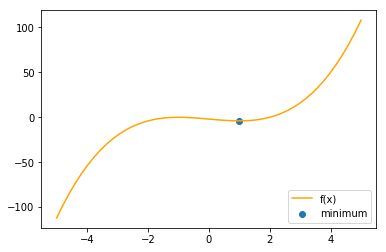

In [193]:
# Unconstrained minimization

f = lambda x: (x-2)*(x+1)**2
res = minimize_scalar(f, method='brent')

x = np.linspace(-5,5)
y = f(x)
plt.plot(x,y, label='f(x)', color='orange')
plt.scatter(res.x,res.fun,label='minimum')
plt.legend(loc='lower right')
plt.show()

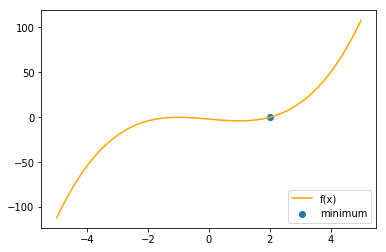

In [199]:
# Bounded minimization

f = lambda x: (x-2)*(x+1)**2
res = minimize_scalar(f, method='bounded', bounds=(2,4))

x = np.linspace(-5,5)
y = f(x)
plt.plot(x,y, label='f(x)', color='orange')
plt.scatter(res.x,res.fun,label='minimum')
plt.legend(loc='lower right')
plt.show()